In [40]:
import pandas as pd
#from catboost import CatBoostClassifier
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer


In [41]:
train_df = pd.read_csv("C:/Users/udbha/Desktop/Python/competitions/titanic/data/train.csv")
test_df = pd.read_csv("C:/Users/udbha/Desktop/Python/competitions/titanic/data/test.csv")

In [42]:
test_df.Fare.fillna(test_df.Fare.mean(), inplace=True)
data_df = train_df.append(test_df) # The entire data: train + test.
passenger_id=test_df['PassengerId']

## We will drop PassengerID and Ticket since it will be useless for our data. 
train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.shape

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(418, 10)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
********************
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


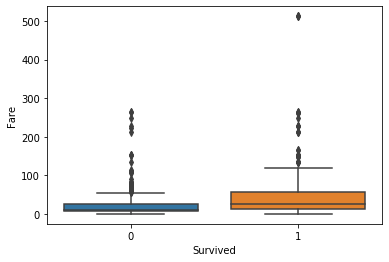

In [43]:
print (train_df.isnull().sum())
print (''.center(20, "*"))
print (test_df.isnull().sum())
sns.boxplot(x='Survived',y='Fare',data=train_df)

In [44]:
train_df=train_df[train_df['Fare']<400]

In [45]:
train_df['Sex'] = train_df.Sex.apply(lambda x: 0 if x == "female" else 1)
test_df['Sex'] = test_df.Sex.apply(lambda x: 0 if x == "female" else 1)

In [46]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [47]:
pd.options.display.max_columns = 99
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [48]:
for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)

data_df['Title'].value_counts()
train_df['Title']=data_df['Title'][:891]
test_df['Title']=data_df['Title'][891:]

titles=['Mr','Miss','Mrs','Master','Rev','Dr']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    #print(age_to_impute)
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
data_df.isnull().sum()



train_df['Age']=data_df['Age'][:891]
test_df['Age']=data_df['Age'][891:]
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Title         0
dtype: int64

In [49]:
## Family_size seems like a good feature to create
train_df['family_size'] = train_df.SibSp + train_df.Parch+1
test_df['family_size'] = test_df.SibSp + test_df.Parch+1

In [50]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train_df['family_group'] = train_df['family_size'].map(family_group)
test_df['family_group'] = test_df['family_size'].map(family_group)

In [51]:
train_df['child'] = [1 if i<16 else 0 for i in train_df.Age]
test_df['child'] = [1 if i<16 else 0 for i in test_df.Age]
train_df.child.value_counts()

0    769
1    119
Name: child, dtype: int64

In [52]:
train_df['calculated_fare'] = train_df.Fare/train_df.family_size
test_df['calculated_fare'] = test_df.Fare/test_df.family_size

In [53]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

In [54]:
train_df['fare_group'] = train_df['calculated_fare'].map(fare_group)
test_df['fare_group'] = test_df['calculated_fare'].map(fare_group)

In [55]:
#comment after use
train_df = pd.get_dummies(train_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)
train_df.drop(['Cabin', 'family_size','Ticket','Name', 'Fare'], axis=1, inplace=True)
test_df.drop(['Ticket','Name','family_size',"Fare",'Cabin'], axis=1, inplace=True)

In [57]:
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        

In [58]:
train_df['age_group'] = train_df['Age'].map(age_group_fun)
test_df['age_group'] = test_df['Age'].map(age_group_fun)

In [59]:
train_df = pd.get_dummies(train_df,columns=['age_group'], drop_first=True)
test_df = pd.get_dummies(test_df,columns=['age_group'], drop_first=True)
#Lets try all after dropping few of the column.
train_df.drop(['Age','calculated_fare'],axis=1,inplace=True)
test_df.drop(['Age','calculated_fare'],axis=1,inplace=True)

In [60]:
train_df.head()
train_df.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)
test_df.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)

In [61]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
#testing = test_df.copy()
#testing.shape

In [63]:
from catboost import CatBoostClassifier

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    CatBoostClassifier(),
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

SSplit=StratifiedShuffleSplit(test_size=0.3,random_state=7)
acc_dict = {}

for train_index,test_index in SSplit.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
          
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6867221	total: 96.4ms	remaining: 1m 36s
1:	learn: 0.6784462	total: 166ms	remaining: 1m 22s
2:	learn: 0.6704626	total: 223ms	remaining: 1m 14s
3:	learn: 0.6625926	total: 303ms	remaining: 1m 15s
4:	learn: 0.6555159	total: 364ms	remaining: 1m 12s
5:	learn: 0.6489002	total: 414ms	remaining: 1m 8s
6:	learn: 0.6422792	total: 483ms	remaining: 1m 8s
7:	learn: 0.6361134	total: 530ms	remaining: 1m 5s
8:	learn: 0.6286900	total: 597ms	remaining: 1m 5s
9:	learn: 0.6225263	total: 661ms	remaining: 1m 5s
10:	learn: 0.6164257	total: 740ms	remaining: 1m 6s
11:	learn: 0.6090929	total: 806ms	remaining: 1m 6s
12:	learn: 0.6048205	total: 861ms	remaining: 1m 5s
13:	learn: 0.5982449	total: 914ms	remaining: 1m 4s
14:	learn: 0.5935058	total: 988ms	remaining: 1m 4s
15:	learn: 0.5875703	total: 1.07s	remaining: 1m 5s
16:	learn: 0.5835067	total: 1.14s	remaining: 1m 6s
17:	learn: 0.5781571	total: 1.23s	remaining: 1m 6s
18:	learn: 0.5730833	total: 1.31s	remaining: 1m 7s
19:	l

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)

Learning rate set to 0.014641
0:	learn: 0.6840150	total: 67.1ms	remaining: 1m 7s
1:	learn: 0.6752564	total: 141ms	remaining: 1m 10s
2:	learn: 0.6663552	total: 204ms	remaining: 1m 7s
3:	learn: 0.6593069	total: 243ms	remaining: 1m
4:	learn: 0.6516840	total: 309ms	remaining: 1m 1s
5:	learn: 0.6449167	total: 349ms	remaining: 57.8s
6:	learn: 0.6392731	total: 383ms	remaining: 54.3s
7:	learn: 0.6326224	total: 443ms	remaining: 55s
8:	learn: 0.6251649	total: 508ms	remaining: 55.9s
9:	learn: 0.6198471	total: 555ms	remaining: 54.9s
10:	learn: 0.6137330	total: 615ms	remaining: 55.3s
11:	learn: 0.6071376	total: 682ms	remaining: 56.1s
12:	learn: 0.6025600	total: 748ms	remaining: 56.8s
13:	learn: 0.5974104	total: 818ms	remaining: 57.6s
14:	learn: 0.5921384	total: 873ms	remaining: 57.3s
15:	learn: 0.5863178	total: 936ms	remaining: 57.6s
16:	learn: 0.5801508	total: 1s	remaining: 57.9s
17:	learn: 0.5752745	total: 1.07s	remaining: 58.6s
18:	learn: 0.5709865	total: 1.15s	remaining: 59.4s
19:	learn: 0.5656

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6840568	total: 48.5ms	remaining: 48.4s
1:	learn: 0.6750965	total: 95ms	remaining: 47.4s
2:	learn: 0.6662043	total: 154ms	remaining: 51.3s
3:	learn: 0.6594825	total: 192ms	remaining: 47.8s
4:	learn: 0.6519578	total: 263ms	remaining: 52.3s
5:	learn: 0.6445727	total: 315ms	remaining: 52.2s
6:	learn: 0.6366971	total: 368ms	remaining: 52.2s
7:	learn: 0.6290745	total: 431ms	remaining: 53.4s
8:	learn: 0.6225312	total: 499ms	remaining: 54.9s
9:	learn: 0.6161639	total: 550ms	remaining: 54.5s
10:	learn: 0.6089575	total: 600ms	remaining: 54s
11:	learn: 0.6021913	total: 649ms	remaining: 53.5s
12:	learn: 0.5962162	total: 702ms	remaining: 53.3s
13:	learn: 0.5902749	total: 749ms	remaining: 52.8s
14:	learn: 0.5869924	total: 777ms	remaining: 51s
15:	learn: 0.5821935	total: 819ms	remaining: 50.4s
16:	learn: 0.5780421	total: 873ms	remaining: 50.5s
17:	learn: 0.5729171	total: 925ms	remaining: 50.5s
18:	learn: 0.5691538	total: 971ms	remaining: 50.2s
19:	learn: 0.56

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6830630	total: 34.4ms	remaining: 34.4s
1:	learn: 0.6725404	total: 86.6ms	remaining: 43.2s
2:	learn: 0.6633978	total: 143ms	remaining: 47.6s
3:	learn: 0.6537475	total: 177ms	remaining: 44.1s
4:	learn: 0.6446201	total: 215ms	remaining: 42.9s
5:	learn: 0.6355156	total: 267ms	remaining: 44.2s
6:	learn: 0.6274204	total: 317ms	remaining: 45s
7:	learn: 0.6198831	total: 369ms	remaining: 45.8s
8:	learn: 0.6110245	total: 424ms	remaining: 46.7s
9:	learn: 0.6022361	total: 478ms	remaining: 47.3s
10:	learn: 0.5961358	total: 537ms	remaining: 48.3s
11:	learn: 0.5878752	total: 600ms	remaining: 49.4s
12:	learn: 0.5816793	total: 659ms	remaining: 50s
13:	learn: 0.5751039	total: 718ms	remaining: 50.5s
14:	learn: 0.5679755	total: 757ms	remaining: 49.7s
15:	learn: 0.5600623	total: 816ms	remaining: 50.2s
16:	learn: 0.5552196	total: 846ms	remaining: 48.9s
17:	learn: 0.5511189	total: 883ms	remaining: 48.2s
18:	learn: 0.5448516	total: 942ms	remaining: 48.6s
19:	learn: 0.

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6830673	total: 76.2ms	remaining: 1m 16s
1:	learn: 0.6757525	total: 143ms	remaining: 1m 11s
2:	learn: 0.6665328	total: 209ms	remaining: 1m 9s
3:	learn: 0.6583234	total: 263ms	remaining: 1m 5s
4:	learn: 0.6493032	total: 315ms	remaining: 1m 2s
5:	learn: 0.6409301	total: 367ms	remaining: 1m
6:	learn: 0.6330020	total: 435ms	remaining: 1m 1s
7:	learn: 0.6252742	total: 491ms	remaining: 1m
8:	learn: 0.6169898	total: 559ms	remaining: 1m 1s
9:	learn: 0.6113098	total: 639ms	remaining: 1m 3s
10:	learn: 0.6049675	total: 711ms	remaining: 1m 3s
11:	learn: 0.5997984	total: 780ms	remaining: 1m 4s
12:	learn: 0.5939426	total: 835ms	remaining: 1m 3s
13:	learn: 0.5883307	total: 895ms	remaining: 1m 3s
14:	learn: 0.5833746	total: 943ms	remaining: 1m 1s
15:	learn: 0.5793132	total: 1.02s	remaining: 1m 2s
16:	learn: 0.5757260	total: 1.07s	remaining: 1m 1s
17:	learn: 0.5708130	total: 1.11s	remaining: 1m
18:	learn: 0.5647656	total: 1.17s	remaining: 1m
19:	learn: 0.5604768

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6855488	total: 27.6ms	remaining: 27.5s
1:	learn: 0.6794047	total: 65.6ms	remaining: 32.8s
2:	learn: 0.6714854	total: 113ms	remaining: 37.6s
3:	learn: 0.6654130	total: 160ms	remaining: 39.9s
4:	learn: 0.6587011	total: 194ms	remaining: 38.6s
5:	learn: 0.6522056	total: 256ms	remaining: 42.5s
6:	learn: 0.6452215	total: 307ms	remaining: 43.5s
7:	learn: 0.6384383	total: 358ms	remaining: 44.4s
8:	learn: 0.6328372	total: 410ms	remaining: 45.1s
9:	learn: 0.6264134	total: 459ms	remaining: 45.5s
10:	learn: 0.6208521	total: 508ms	remaining: 45.7s
11:	learn: 0.6145397	total: 559ms	remaining: 46s
12:	learn: 0.6085874	total: 611ms	remaining: 46.4s
13:	learn: 0.6035932	total: 666ms	remaining: 46.9s
14:	learn: 0.5995922	total: 700ms	remaining: 46s
15:	learn: 0.5942204	total: 747ms	remaining: 46s
16:	learn: 0.5896240	total: 776ms	remaining: 44.9s
17:	learn: 0.5843853	total: 829ms	remaining: 45.3s
18:	learn: 0.5791340	total: 874ms	remaining: 45.1s
19:	learn: 0.57

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6843418	total: 39.8ms	remaining: 39.7s
1:	learn: 0.6757612	total: 82.5ms	remaining: 41.2s
2:	learn: 0.6675062	total: 115ms	remaining: 38.3s
3:	learn: 0.6593714	total: 174ms	remaining: 43.3s
4:	learn: 0.6523830	total: 240ms	remaining: 47.7s
5:	learn: 0.6427065	total: 296ms	remaining: 49.1s
6:	learn: 0.6348545	total: 351ms	remaining: 49.8s
7:	learn: 0.6256598	total: 407ms	remaining: 50.5s
8:	learn: 0.6189382	total: 453ms	remaining: 49.8s
9:	learn: 0.6124039	total: 499ms	remaining: 49.4s
10:	learn: 0.6061329	total: 545ms	remaining: 49s
11:	learn: 0.5988929	total: 612ms	remaining: 50.3s
12:	learn: 0.5930117	total: 649ms	remaining: 49.3s
13:	learn: 0.5869908	total: 699ms	remaining: 49.2s
14:	learn: 0.5810167	total: 748ms	remaining: 49.1s
15:	learn: 0.5752869	total: 797ms	remaining: 49s
16:	learn: 0.5709154	total: 847ms	remaining: 49s
17:	learn: 0.5661173	total: 895ms	remaining: 48.8s
18:	learn: 0.5599353	total: 942ms	remaining: 48.6s
19:	learn: 0.55

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6846042	total: 34.9ms	remaining: 34.8s
1:	learn: 0.6756932	total: 94.4ms	remaining: 47.1s
2:	learn: 0.6664123	total: 144ms	remaining: 48s
3:	learn: 0.6587507	total: 183ms	remaining: 45.6s
4:	learn: 0.6511571	total: 222ms	remaining: 44.1s
5:	learn: 0.6449329	total: 271ms	remaining: 44.9s
6:	learn: 0.6371687	total: 326ms	remaining: 46.2s
7:	learn: 0.6310298	total: 374ms	remaining: 46.4s
8:	learn: 0.6244483	total: 423ms	remaining: 46.6s
9:	learn: 0.6171724	total: 501ms	remaining: 49.6s
10:	learn: 0.6114925	total: 570ms	remaining: 51.2s
11:	learn: 0.6065983	total: 638ms	remaining: 52.5s
12:	learn: 0.6005023	total: 670ms	remaining: 50.9s
13:	learn: 0.5938916	total: 715ms	remaining: 50.4s
14:	learn: 0.5892784	total: 749ms	remaining: 49.2s
15:	learn: 0.5832398	total: 807ms	remaining: 49.6s
16:	learn: 0.5766942	total: 857ms	remaining: 49.5s
17:	learn: 0.5706348	total: 908ms	remaining: 49.5s
18:	learn: 0.5657770	total: 977ms	remaining: 50.4s
19:	learn: 

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6853208	total: 15.1ms	remaining: 15s
1:	learn: 0.6769242	total: 35.7ms	remaining: 17.8s
2:	learn: 0.6693764	total: 51.1ms	remaining: 17s
3:	learn: 0.6598110	total: 78.3ms	remaining: 19.5s
4:	learn: 0.6524254	total: 105ms	remaining: 20.8s
5:	learn: 0.6446700	total: 128ms	remaining: 21.1s
6:	learn: 0.6369194	total: 158ms	remaining: 22.5s
7:	learn: 0.6295811	total: 181ms	remaining: 22.4s
8:	learn: 0.6226685	total: 203ms	remaining: 22.3s
9:	learn: 0.6152962	total: 224ms	remaining: 22.2s
10:	learn: 0.6091227	total: 252ms	remaining: 22.6s
11:	learn: 0.6044075	total: 273ms	remaining: 22.5s
12:	learn: 0.5987538	total: 286ms	remaining: 21.7s
13:	learn: 0.5929935	total: 321ms	remaining: 22.6s
14:	learn: 0.5869034	total: 362ms	remaining: 23.8s
15:	learn: 0.5817482	total: 383ms	remaining: 23.6s
16:	learn: 0.5780240	total: 399ms	remaining: 23.1s
17:	learn: 0.5736374	total: 461ms	remaining: 25.1s
18:	learn: 0.5689848	total: 503ms	remaining: 25.9s
19:	learn: 

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.014641
0:	learn: 0.6861522	total: 12.6ms	remaining: 12.6s
1:	learn: 0.6757639	total: 35.5ms	remaining: 17.7s
2:	learn: 0.6665897	total: 56.4ms	remaining: 18.8s
3:	learn: 0.6577740	total: 78.9ms	remaining: 19.6s
4:	learn: 0.6491615	total: 104ms	remaining: 20.8s
5:	learn: 0.6425408	total: 125ms	remaining: 20.8s
6:	learn: 0.6343382	total: 158ms	remaining: 22.5s
7:	learn: 0.6259931	total: 187ms	remaining: 23.2s
8:	learn: 0.6203461	total: 217ms	remaining: 23.9s
9:	learn: 0.6139993	total: 238ms	remaining: 23.6s
10:	learn: 0.6085024	total: 261ms	remaining: 23.5s
11:	learn: 0.6006207	total: 281ms	remaining: 23.2s
12:	learn: 0.5947777	total: 304ms	remaining: 23.1s
13:	learn: 0.5905849	total: 319ms	remaining: 22.4s
14:	learn: 0.5834671	total: 342ms	remaining: 22.4s
15:	learn: 0.5770331	total: 363ms	remaining: 22.3s
16:	learn: 0.5726795	total: 385ms	remaining: 22.3s
17:	learn: 0.5663398	total: 412ms	remaining: 22.5s
18:	learn: 0.5611298	total: 442ms	remaining: 22.8s
19:	lea

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Classifier Accuracy')

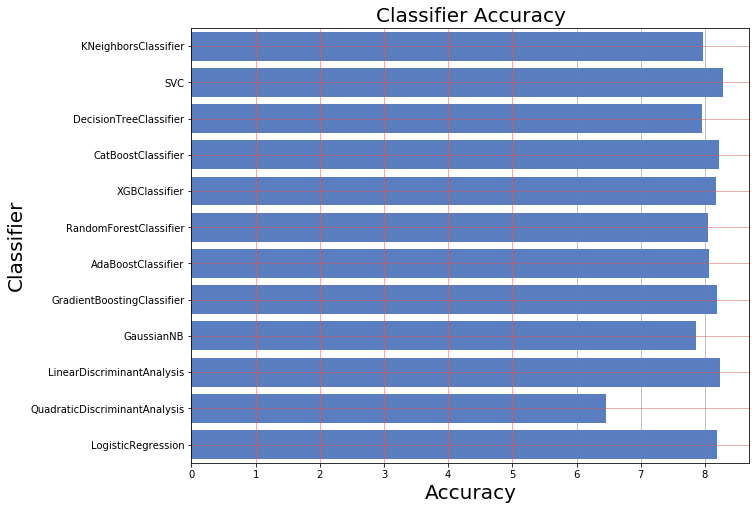

In [66]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
#log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

In [67]:


## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix



In [68]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
testframe = std_scaler.fit_transform(test_df)
testframe.shape

(418, 22)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1000)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,confusion_matrix
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train,y_train)
predict=logreg.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8258426966292135
[[91 11]
 [20 56]]
0.835820895522388
0.7368421052631579


In [71]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=10,shuffle=True), n_jobs=1,scoring='accuracy')

In [72]:
grid.fit(X_train,y_train)
print (grid.best_params_)
print (grid.best_score_)
print(grid.best_estimator_)

{'C': 0.25, 'penalty': 'l1'}
0.8267605633802817
LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
#grid.best_estimator_.fit(X_train,y_train)
#predict=grid.best_estimator_.predict(X_test)
#print(accuracy_score(y_test,predict))
logreg_grid = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'])
logreg_grid.fit(X_train,y_train)
y_pred = logreg_grid.predict(X_test)
logreg_accy = round(accuracy_score(y_test, y_pred), 3)
print (logreg_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.848
[[94  8]
 [19 57]]
0.8769230769230769
0.75


C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
AdaC=AdaBoostClassifier()

AdaC.fit(X_train,y_train)
predict=AdaC.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))

0.8146067415730337
[[89 13]
 [20 56]]
0.8115942028985508


In [78]:
from sklearn.tree import DecisionTreeClassifier
n_estimator=[50,60,100,150,200,300]
learning_rate=[0.001,0.01,0.1,0.2,0.3]
hyperparam={'n_estimators':n_estimator,'learning_rate':learning_rate}
gridBoost=GridSearchCV(AdaC,param_grid=hyperparam,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1,scoring='accuracy')

In [79]:
gridBoost.fit(X_train,y_train)
print(gridBoost.best_score_)
print(gridBoost.best_estimator_)

0.8225352112676056
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=300, random_state=None)


In [80]:
gridBoost.best_estimator_.fit(X_train,y_train)
predict=gridBoost.best_estimator_.predict(X_test)
print(accuracy_score(y_test,predict))

0.8089887640449438


In [81]:
xgb=XGBClassifier(max_depth=2, n_estimators=700, learning_rate=0.009,nthread=-1,subsample=1,colsample_bytree=0.8)
xgb.fit(X_train,y_train)
predict=xgb.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8370786516853933
[[95  7]
 [22 54]]
0.8852459016393442
0.7105263157894737


In [82]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predict=lda.predict(X_test)
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8426966292134831
0.875
0.7368421052631579


In [83]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=20,max_features=0.2, min_samples_leaf=8,random_state=20)
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.831
0.8484848484848485
0.7368421052631579
[[92 10]
 [20 56]]


In [84]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred = BaggingClassifier.predict(X_test)
bagging_accy = round(accuracy_score(y_pred, y_test), 3)
print(bagging_accy)

0.82


In [85]:
# Prediction with catboost algorithm.
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=False, one_hot_max_size=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc = round(accuracy_score(y_pred, y_test), 3)
print(acc)

0.815


In [87]:
y_predict=model.predict(testframe)

In [88]:
temp = pd.DataFrame(pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": y_predict
    }))

In [92]:
temp.to_csv('submission_2.csv',index = True)

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_train=df_train.drop(columns=['Cabin'])

In [17]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
df_train['Age'].mean()

29.69911764705882

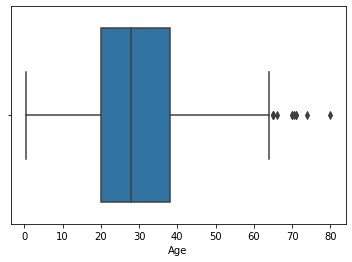

In [21]:
sns.boxplot(df_train['Age'])

In [23]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
df_train['Age']=df_train.fillna(df_train['Age'].mean())

In [27]:
df_train.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [28]:
from sklearn.preprocessing import LabelEncoder

In [10]:
X_test = df_train['Survived']
X_train = df_train.drop(columns=['Survived'])